# Project
## Init stuff

In [68]:
import sys
import os
import argparse
import random

import datetime
import time
import copy

import numpy as np
import sklearn

import scipy as sp
import pandas as pd

import torch
import torchvision

# we'll use torch for neural networks
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data
from torch.utils.data import TensorDataset, DataLoader, random_split

# we'll use torchvision for computer vision tasks
from torchvision import transforms
from torchvision.transforms import Compose, ToTensor, Resize, Normalize
from torchvision.datasets import CIFAR10
import torchvision.utils as vutils

%matplotlib inline
from matplotlib import pyplot as plt
seed = 42 # deterministic seed
torch.manual_seed(seed)
np.random.seed(seed) 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Training and inference with device: {device}')

Training and inference with device: cpu


## Gets labels and data

In [ ]:
image_path = "images"

labels = [item for item in os.listdir(image_path) if os.path.isdir(os.path.join(image_path,item))]
labels = sorted(labels)
print(labels)
# Gets image data from files
image_transform =  Compose([transforms.PILToTensor()])
image_data= torchvision.datasets.ImageFolder(image_path, transform=image_transform)

train_data, eval_data = random_split(image_data, [.7, .3])

train_data= DataLoader(train_data, batch_size=32, shuffle=True)
eval_data= DataLoader(eval_data, batch_size=32, shuffle=True)

['backpack', 'book', 'calculator', 'chair', 'clock', 'desk', 'keychain', 'laptop', 'paper', 'pen', 'phone', 'water bottle']


## Display a Batch of Data

['clock', 'pen', 'book', 'book', 'phone', 'laptop', 'backpack', 'clock', 'laptop', 'book', 'clock', 'laptop', 'paper', 'water bottle', 'book', 'laptop', 'calculator', 'desk', 'keychain', 'pen', 'desk', 'book', 'calculator', 'paper', 'backpack', 'calculator', 'keychain', 'water bottle', 'keychain', 'keychain', 'desk', 'backpack']


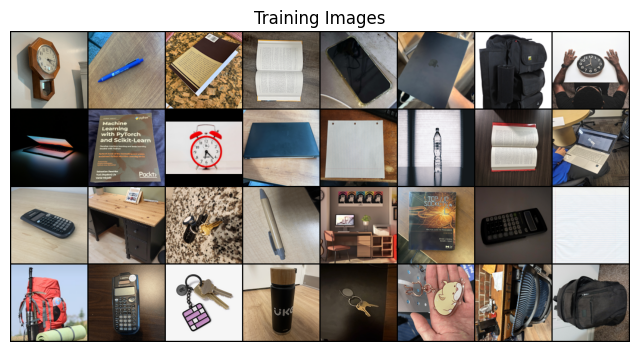

In [124]:

iterator = iter(train_data)
batch = next(iterator)
image_labels = [ labels[i] for i in batch[-1]]
print(image_labels)
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid( batch[0]),(1,2,0)))

## Creating the model